In [28]:
import torch
import os
import numpy as np
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from tqdm import tqdm
import cv2
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [29]:
torch.device('cuda')
torch.cuda.empty_cache()

# imagePaths = []

dataset_path = 'dataset_with_mask'

In [30]:
np.random.seed(42)

trfm = get_transforms(do_flip=True, flip_vert=True, max_zoom=1.2, max_rotate=20.0, max_lighting=0.4)

data = ImageDataBunch.from_folder(dataset_path,train='.',valid_pct =0.2,num_workers = 4,bs=16).normalize(imagenet_stats)
# ,ds_tfms = trfm

learn = cnn_learner(data,models.vgg16_bn,metrics = [error_rate,accuracy,FBeta(beta=1, average='macro')],callback_fns=ShowGraph)

data.classes

['angela_merkel',
 'anushka_sharma',
 'donald_trump',
 'narendra_modi',
 'salman_khan',
 'shushant_singh_rajput',
 'vladimir_putin']

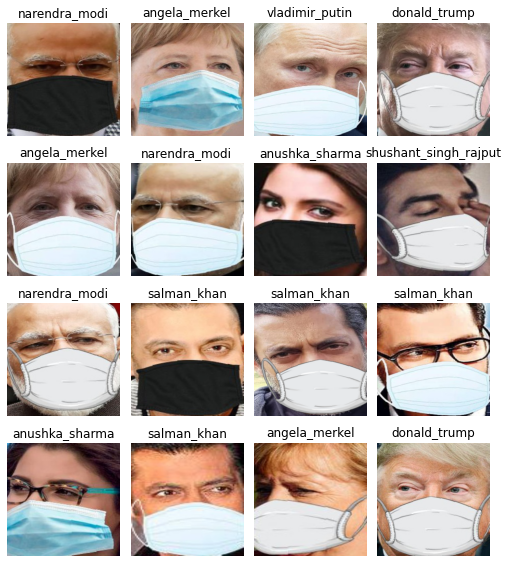

In [31]:
data.show_batch(rows=5,figsize=(7,8))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.909040,1.558677,0.574468,0.425532,00:12
1,1.847162,0.575817,0.170213,0.829787,00:08
2,1.171959,0.443831,0.138298,0.861702,00:08
3,0.778969,0.386831,0.117021,0.882979,00:08
4,0.547399,0.482794,0.095745,0.904255,00:08
5,0.410526,0.391113,0.095745,0.904255,00:08


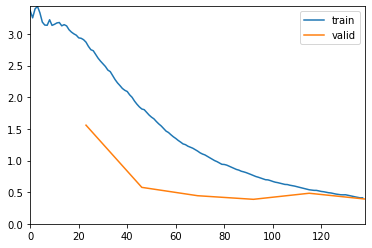

In [32]:

learn.fit_one_cycle(6, max_lr =[1e-6, 1e-4, 1e-3])
# , max_lr =[1e-6, 1e-4, 1e-3]
learn.save('vgg16_bn') 



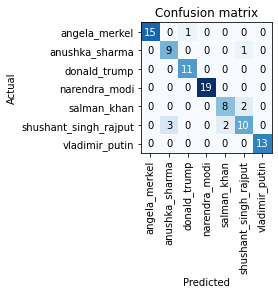

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

# interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix()
interp.plot_top_losses(9, figsize=(7,6))

(Category tensor(3),
 tensor(3),
 tensor([0.0628, 0.0222, 0.0329, 0.4266, 0.1253, 0.3261, 0.0042]))

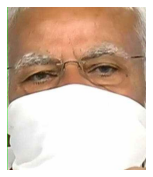

In [34]:
img = open_image('test_data1/photo.jpg')
# (image.jpg is any random image.)
img.show(figsize=(3, 3))

learn.predict(img)

In [7]:
learn.export()

In [40]:
src = "dataset_with_mask/models/"
dest = "models"
shutil.copytree(src,dest)
src = "dataset_with_mask/export.pkl"
dest = "."
shutil.copy(src,dest)

'./export.pkl'

In [50]:
for i in os.listdir('dataset_with_mask/models'):
    os.remove(f'dataset_with_mask/models/{i}')
os.rmdir('dataset_with_mask/models')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_with_mask/models'

In [51]:
os.remove('dataset_with_mask/export.pkl')